In [1]:
import os
import pandas as pd
import missingno as msno

FOLDER_RAW = os.environ.get('DIR_DATA_RAW')
DATA_CRIME = 'On_Street_Crime_In_Camden.csv'

In [2]:
df = pd.read_csv(filepath_or_buffer=FOLDER_RAW + "/" + DATA_CRIME, 
                 parse_dates=['Outcome Date', 'Epoch'])

# Exploring missing data

Visualise the missing data in our dataset on crimes so we know which columns have a lot of missing data and also to decide on a strategy for dealing with these missing values.

For instance, if we have a lot of data missing, we will be less inclined to delete these rows, whereas if we had little data missing, we will be more inclined to delete these rows.

We see in the plot below of the number of missing values for each column that the `Context` and `Location Subtype` columns have plenty of missing values, so much so, they are pretty much useless so we will ignore them in our analysis.

The `Outcome Category`, `Outcome Date` and `Persistent ID` columns have less missing values, and in the case of `Persistent ID`, this may be less of an issue because it looks like an identifier column. The other two are a bit more concerning as they are fairly important variables in our data. Let's dig deeper.

<AxesSubplot:>

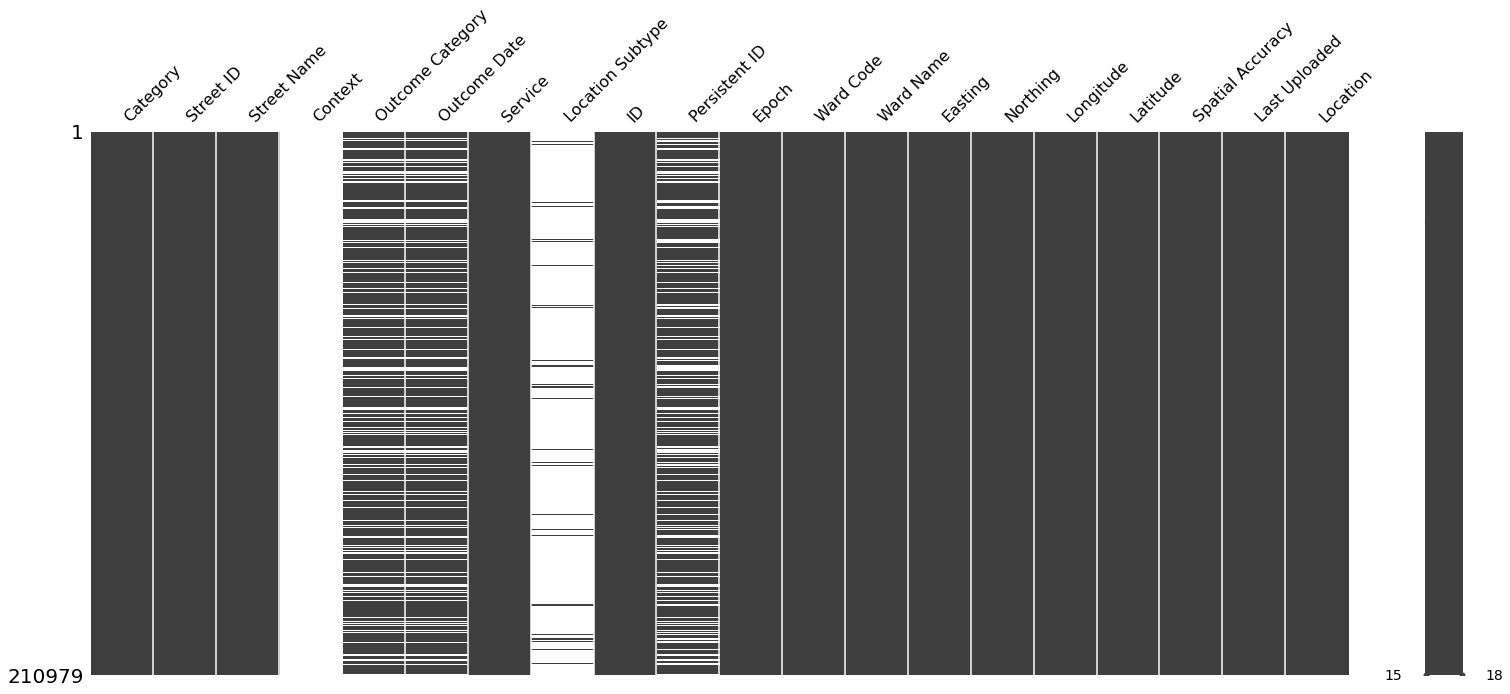

In [3]:
msno.matrix(df)

In the below barchart, we see that about 20% of our data in the `Outcome Category` and `Outcome Date` columns are missing. This is a fairly substantial proportion and is worth bearing in mind in the analysis ahead where we consider non-missing data only. Indeed the counts of missing data in these two columns are the same and in the immediately previous plot, we find when `Outcome Date` is missing then `Outcome Category` is also. Interestingly, `Category` is not missing also.

<AxesSubplot:>

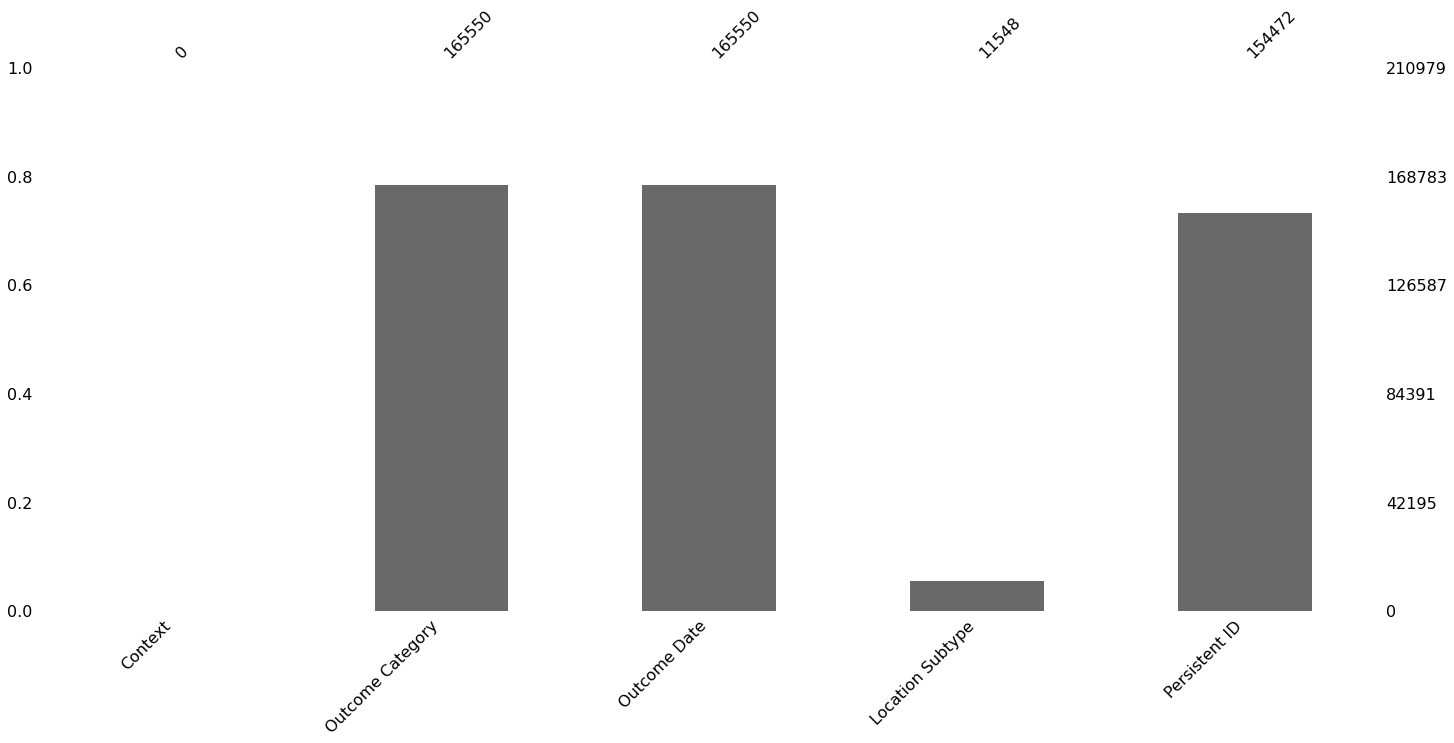

In [4]:
msno.bar(df[['Context', 'Outcome Category', 'Outcome Date', 'Location Subtype', 'Persistent ID']])

Further exploring the relationship in missing values, we identify the correlation between missing values in each of the columns - how strongly the presence or absence of one variable affects the presence of another.

Thus a high positive number between two columns means that if one record in the first column is missing data, then it is highly likely that the record in the second column is missing also. A high negative number would be the opposite, namely that if one record in the first column is missing data, then it is highly likely that the record in the second column is not missing data.

Thus in the correlation heatmap of empty values, we find a perfect positive linear relationship between `Outcome Date` and `Outcome Category`. When we have a missing value in `Outcome Date` then we will have a missing value in `Outcome Category` also.

This supports our earlier findings that there seems to be a link in data missing between the `Outcome Date` and `Outcome Category` columns.

We ignore the findings for `Persistent ID` as this column is not as important for our analysis.

<AxesSubplot:>

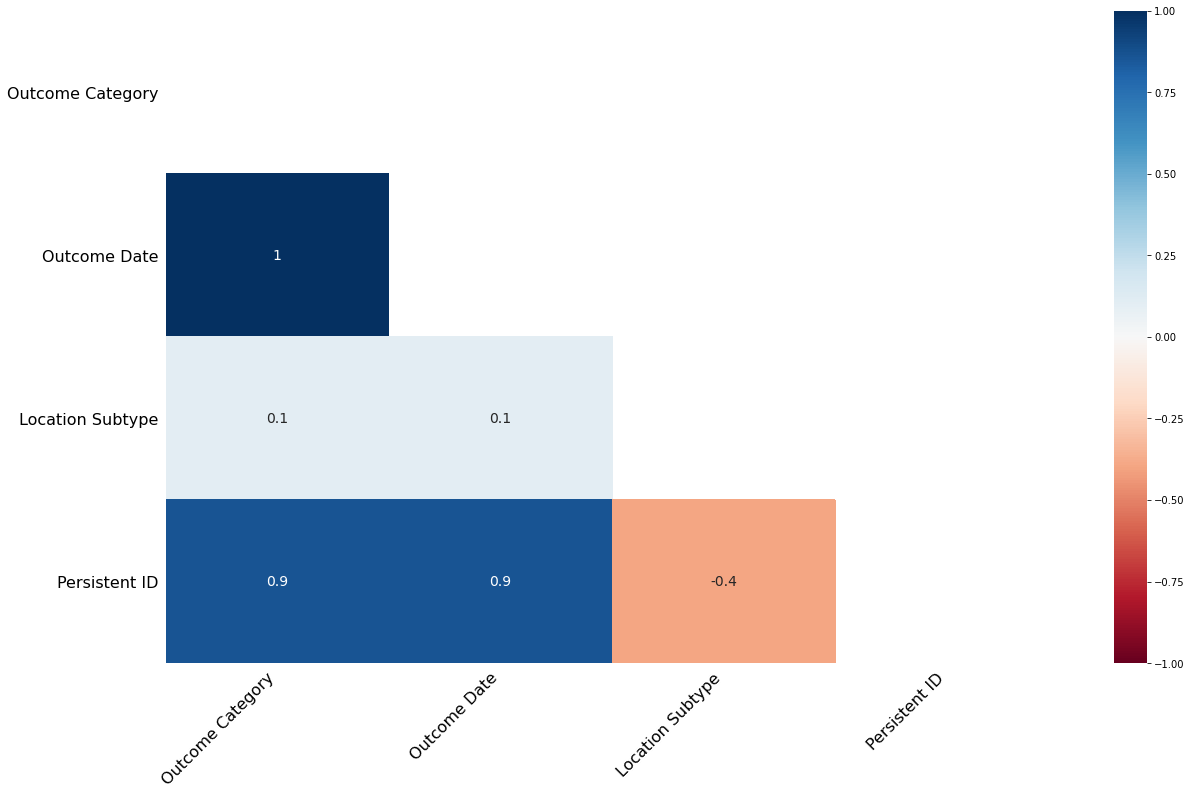

In [5]:
msno.heatmap(df)

### Further notes
Whilst it is unnecessary to dig deeper into the empty values for this dataset (we explored each possible column), if we had more columns with empty values then we could. in which case, we could use [dendrograms](https://www.displayr.com/what-is-dendrogram/#:~:text=A%20dendrogram%20is%20a%20diagram,to%20allocate%20objects%20to%20clusters.) to show the hierarchical relationship between objects - thus is mainly used for hierarchical clustering to work out the best way to allocate objects to clusters.

In the context of missing values, then this uses a hierarchical clustering algorithm to bin columns by their correlation of nullity (which is what we saw in the heatmap) and then it tests how these groups of columns relate to themselves and so on...

***
#### References
[[*missingno package: ResidentMario, Nov 2020*](https://github.com/ResidentMario/missingno)]

[[*Visualising the nothing: T. Carvalho, Aug 2020*](https://towardsdatascience.com/visualizing-the-nothing-ae6daccc9197)]

